PROYECTO FINAL - CODERHOUSE DATA SCIENCE 

Alumno: Matias Mastropietro

ABSTRACT

El datasets contiene informacion sobre accidentes de transito en donde se encuentre involucrado un peaton y un vehículo de motor o una bicicleta o incluso un caballo. Cualquier accidente que involucre a alguien a pie y alguna otra fuerza. Estos datos tratan sobre este tipo de accidentes en Estados Unidos del año 2010 al año 2018.



PREGUNTAS E HIPOTESIS

La finalidad de este trabajo será conocer cuáles son las variables que más afectan a la variable "Worst Injury in Crash" de un accidente con peaotes, y poder armar un modelo que detecte en base a las variables más relevantes si un futuro accidente será "Worst Injury in Crash" = A (Lesiones Serias) o K (Lesiones fatales).

Es un problema es de clasificación.

Entre las subsiguientes hipotesis se encuentran:

La mayor cantidad de accidentes se producen en la oscuridad.
La mayor cantidad de accidentes son producidas por el género masculino.


DICCIONARIO DE VARIABLES

Crash Year = Año del accidente
Crash Month = Mes del accidente
Crash Day = Dia del accidente
Time of Day = Hora del accidente
Day of Week = Dia de la semana del accidente
City or Township = Lugar del accidente
Crash: Intersection = Si fue en una interseccion o no
Crash: Hit-and-Run = Si luego del accidente se escapo de la escena (Hit and run or Not hit and run)
Lighting Conditions = Condiciones de luminosidad al momento del accidente
Weather Condition = Como era el clima al momento del accidente
Speed Limit at Crash Site = Velocidad al momento del accidente
Worst Injury in Crash = Grado de lesiones (O = Sin lesiones, A = Lesiones serias, B = Lesiones Leves, C= Posibles Lesiones, K= Lesiones fatales )
Party Type = Conductor de auto
Person Age = Edad de la persona que sufrio el siniestro
Person Gender = Genero de la persona que sufrio el siniestro



MONTANDO DATASET E IMPORTANDO LIBRERIAS


In [647]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [648]:
#Carga de dataset / Default separator is ',' . / 'utf-8' codec can't decode por lo que uso otra codificacion
df = pd.read_csv("ped_crashes.csv", encoding="latin1")
#df = pd.read_csv("encuesta-anual-hogares-2019.csv")

DATA WRANGLING
Consiste en la manipulación, limpieza y unificación de datos complejos y desordenados para facilitar EL análisis y modelado. 


In [649]:
# Se observa en el DataFrame el nombre de cada columna, su Indice, la cantidad de columnas que posee (15) y filas (6809). Ademas se puede observar el tipo de datos de cada columna. 
#Por último se observa la cantidad de filas sin Nulos que posee cada columna.
# Tipo de datos: int64(10) : Caracteres numericos, entero de 64 Bits y object() Se asigna a la columna cuando posee tipos de datos mixtos (numeros y caracteres)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Crash Year                  6809 non-null   int64 
 1   Crash Month                 6809 non-null   object
 2   Crash Day                   6809 non-null   int64 
 3   Time of Day                 6809 non-null   object
 4   Day of Week                 6809 non-null   object
 5   City or Township            6809 non-null   object
 6   Crash: Intersection         6809 non-null   object
 7   Crash: Hit-and-Run          6809 non-null   object
 8   Lighting Conditions         6809 non-null   object
 9   Weather Conditions (2016+)  6809 non-null   object
 10  Speed Limit at Crash Site   6809 non-null   object
 11  Worst Injury in Crash       6809 non-null   object
 12  Party Type                  6809 non-null   object
 13  Person Age                  6809 non-null   obje

In [650]:
#Lectura de primeras filas del dataset
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [651]:
# Forma del DataSet: Se observa que posee 6809 filas y 15 columnas
df.shape

(6809, 15)

In [652]:
# Descripcion estadistica de los datos numericos
df.describe()

,Crash Year,Crash Day
count,6809.000000,6809.000000
mean,2013.992216,15.384197
std,2.597471,8.701025
min,2010.000000,1.000000
25%,2012.000000,8.000000
50%,2014.000000,15.000000
75%,2016.000000,23.000000
max,2018.000000,31.000000


In [653]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crash Year,6809.0,2013.992216,2.597471,2010.0,2012.0,2014.0,2016.0,2018.0
Crash Day,6809.0,15.384197,8.701025,1.0,8.0,15.0,23.0,31.0


In [654]:
# Cantidad de filas por columnas
df.count()

Crash Year                    6809
Crash Month                   6809
Crash Day                     6809
Time of Day                   6809
Day of Week                   6809
City or Township              6809
Crash: Intersection           6809
Crash: Hit-and-Run            6809
Lighting Conditions           6809
Weather Conditions (2016+)    6809
Speed Limit at Crash Site     6809
Worst Injury in Crash         6809
Party Type                    6809
Person Age                    6809
Person Gender                 6809
dtype: int64

In [655]:
#Revisamos el total de datos nulos por fila
#No hay nulos.

df.isnull().sum()

Crash Year                    0
Crash Month                   0
Crash Day                     0
Time of Day                   0
Day of Week                   0
City or Township              0
Crash: Intersection           0
Crash: Hit-and-Run            0
Lighting Conditions           0
Weather Conditions (2016+)    0
Speed Limit at Crash Site     0
Worst Injury in Crash         0
Party Type                    0
Person Age                    0
Person Gender                 0
dtype: int64

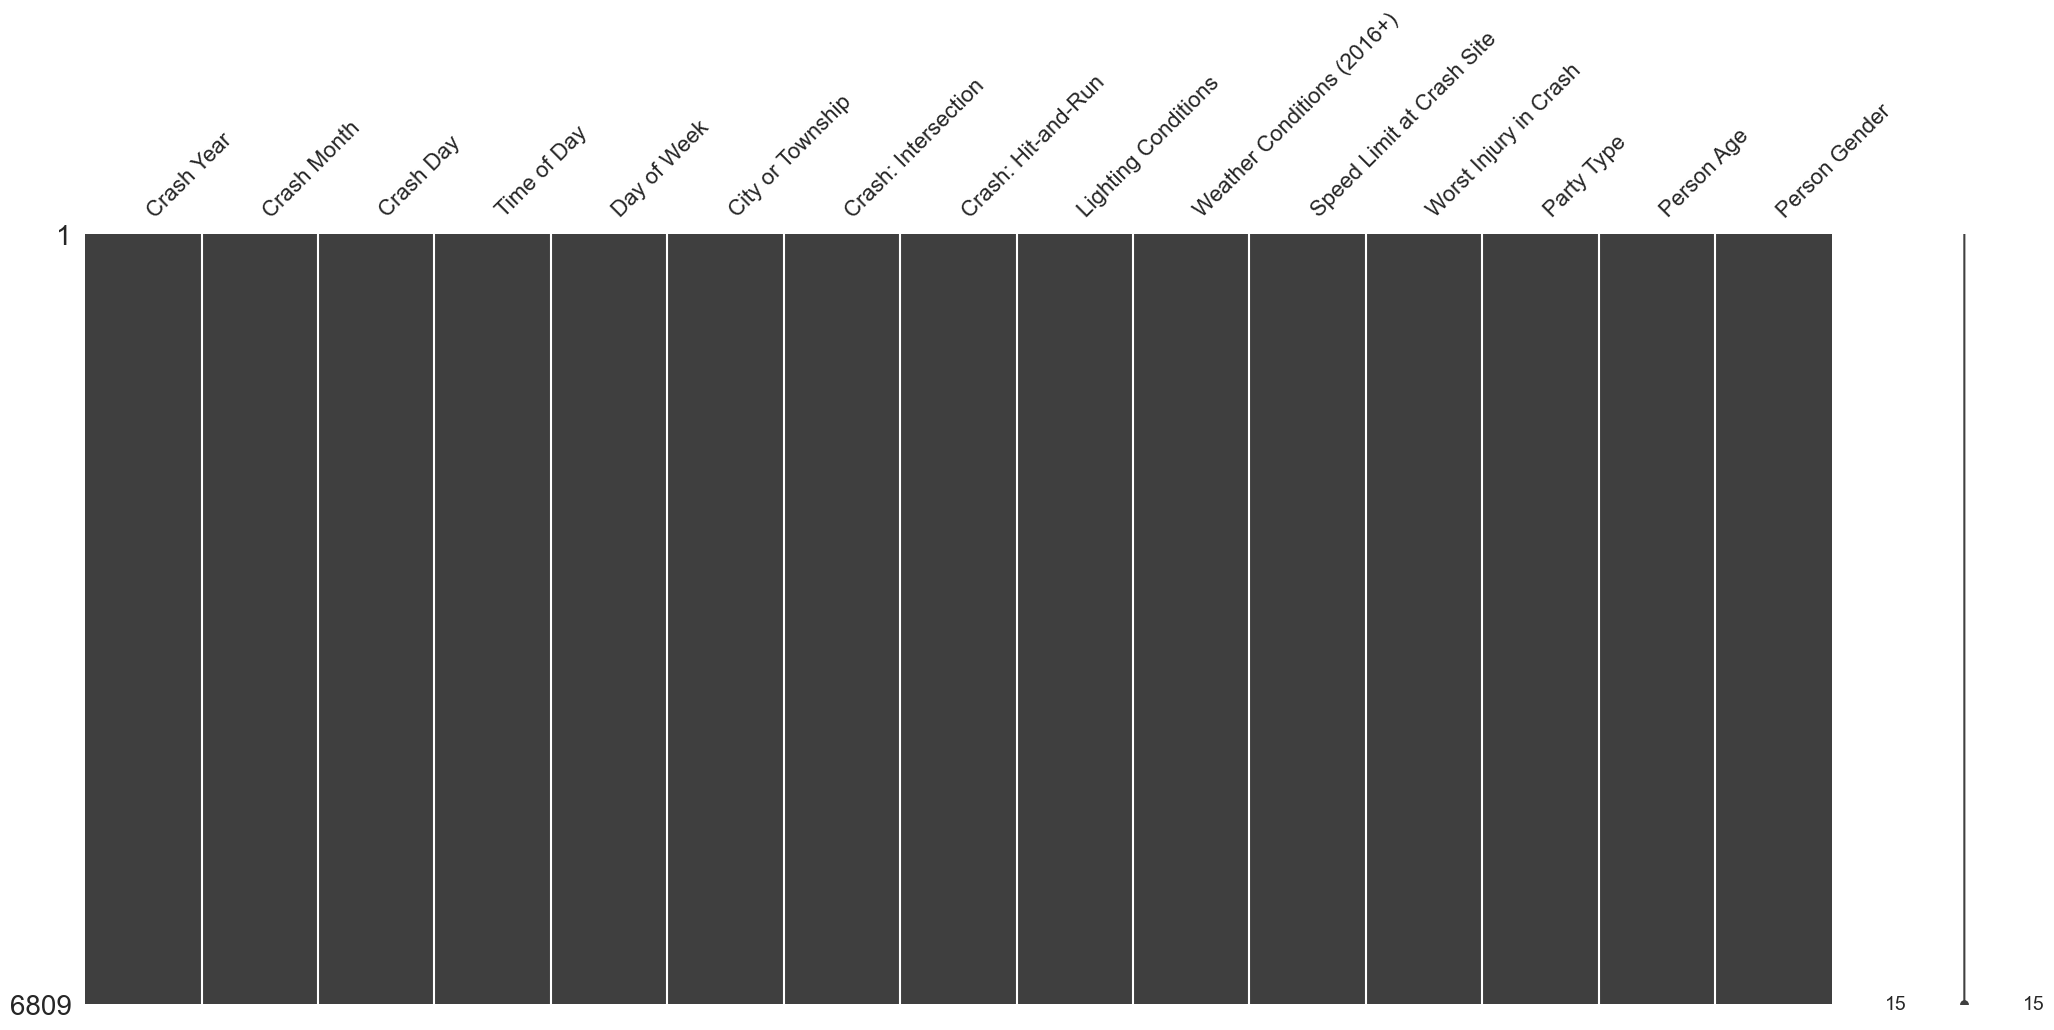

In [656]:
#Corroboramos que no existen valores Nulos con la libreria missingno.
import missingno as msno
msno.matrix(df)
plt.show()
     

In [657]:
#En la columna Time of Day reemplazamos los valores midnight por AM y noon por PM:

df['Time of Day'] = df['Time of Day'].str.replace('midnight','AM')
df['Time of Day'] = df['Time of Day'].str.replace('noon','PM')
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1,11:00 AM - 12:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [658]:
# Sanitizo columna Lighting Conditions reemplazando conjunto de valores.
df.replace({'Lighting Conditions': {'Uncoded & errors': 'Desconocido', 'Other / unknown': 'Desconocido'}},inplace = True)

In [659]:
df.sample(n=5)

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
1002,2017,June,8,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Daylight,Clear,35,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors
1439,2017,June,26,5:00 PM - 6:00 PM,Monday,Wayne County: Hamtramck,Not intersection crash,Not hit-and-run,Daylight,Clear,25,Suspected serious injury (A),Motor vehicle driver,DOB invalid,Uncoded & errors
1924,2016,October,17,4:00 PM - 5:00 PM,Monday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Male
1702,2016,June,7,2:00 PM - 3:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Daylight,Cloudy,35,Suspected serious injury (A),Motor vehicle driver,43,Male
4600,2012,February,3,6:00 AM - 7:00 AM,Friday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Uncoded & errors,35,Possible injury (C),Motor vehicle driver,62,Male


In [660]:
# Remuevo strings de  numeric lines
#df['Person Age'] = df['Person Age'].str.replace('Less than ','')
#df['Person Age'] = df['Person Age'].str.replace(' year old','')
#df['Person Age'] = df['Person Age'].str.replace('DOB invalid','')
#df['Person Age'] = df['Person Age'].replace('','0').astype(int)
#df.sample(n=5)
print(df['Person Age'].unique())

['DOB invalid' '44' '27' '22' '18' '20' '47' '50' '51' '36' '17' '31' '53'
 '21' '69' '52' '26' '58' '59' '35' '78' '63' '60' '70' '33' '73' '57'
 '46' '61' '41' '29' '76' '86' '49' '19' '37' '30' '28' '45' '48' '23'
 '40' '25' '56' '24' '89' '55' '43' '54' '62' '38' '64' '42' '66' '74'
 '11' '34' '65' '32' '39' '81' '77' '71' '67' '80' '68' '85' '7' '82' '84'
 'Less than 1 year old' '75' '72' '16' '79' '91' '88' '15' '87' '83' '95'
 '93' '14' '4' '90' '12' '92']


In [661]:
df['Person Age'] = df['Person Age'].str.replace('DOB invalid', '-1')
df['Person Age'] = df['Person Age'].str.replace('Less than 1 year old', '0')
df['Person Age'] = df['Person Age'].astype('int')
print(df['Person Age'].unique())

[-1 44 27 22 18 20 47 50 51 36 17 31 53 21 69 52 26 58 59 35 78 63 60 70
 33 73 57 46 61 41 29 76 86 49 19 37 30 28 45 48 23 40 25 56 24 89 55 43
 54 62 38 64 42 66 74 11 34 65 32 39 81 77 71 67 80 68 85  7 82 84  0 75
 72 16 79 91 88 15 87 83 95 93 14  4 90 12 92]


GRAFICOS

Cantidad de accidentes por año: Se observa que el año con mayor cantidad de accidentes fue el 2018.

Cantidad de accidentes por dia de la semana: Se observa que el dia con mayor cantidad de accidentes es el Viernes y el domingo el dia de menor cantidad.

Cantidad de accidentes de acuerdo al limite de velocidad: Se observa que la mayor cantidad de accidentes se produce a los 25 km/h.

cantidad de accidentes por hora en el dia: Se observa que la mayor cantidad de accidentes se produce en el rango horario de 17 a 19 hs siendo las 18 hs
el horario donde se producen la mayor cantidad de accidentes.




C:\Users\mastr\AppData\Local\Temp\ipykernel_1928\536452740.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), size = 9)
C:\Users\mastr\AppData\Local\Temp\ipykernel_1928\536452740.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Hora'] = pd.to_datetime(df2['Hora']).dt.strftime('%H')


[Text(0.5, 0, 'Cantidad de accidentes')]

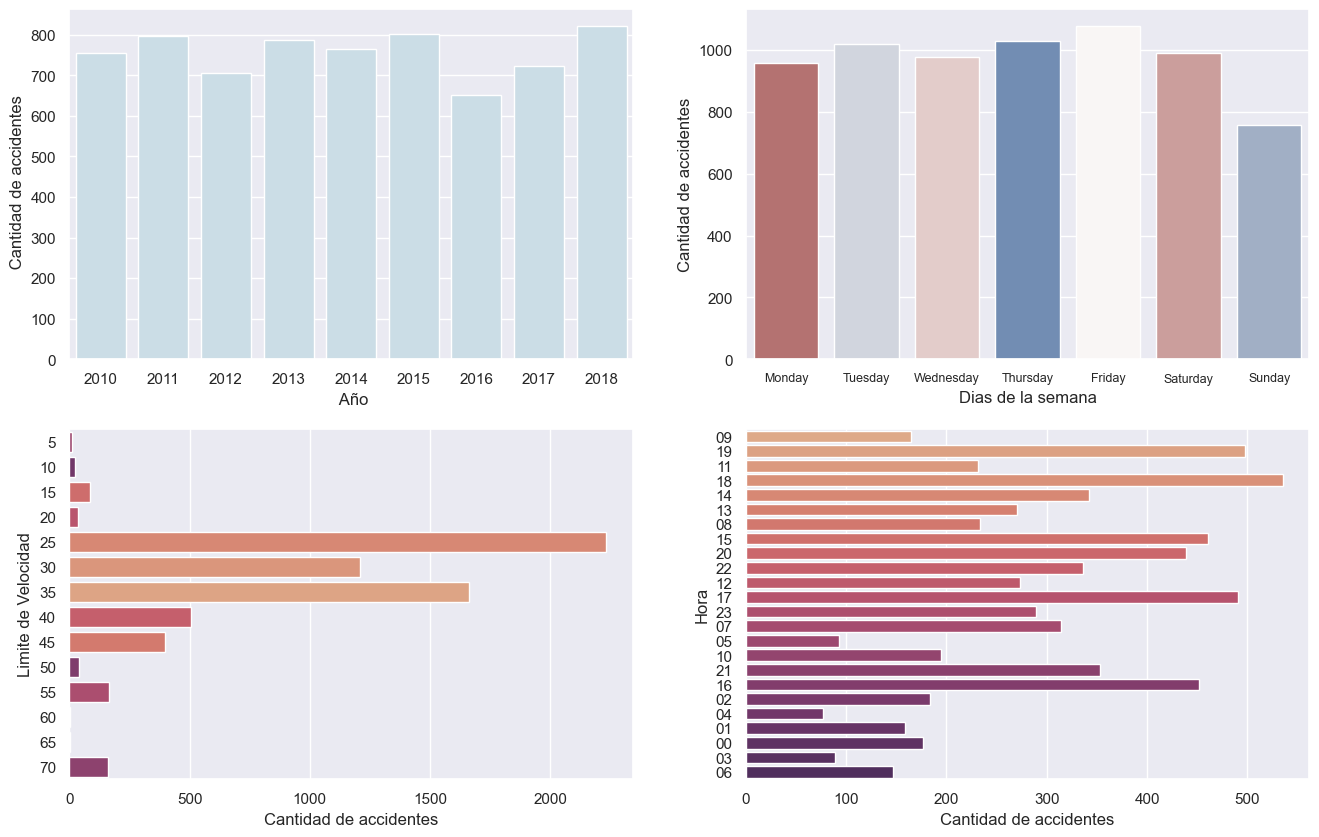

In [664]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.set_palette("ch:s=.25,rot=-.25",9)

# Año con mas accidentes
sns.countplot(x=df["Crash Year"], ax = ax[0,0])
ax[0,0].set(ylabel=' Cantidad de accidentes')
ax[0,0].set(xlabel=' Año')

# Dia de la semana con mas accidentes
dias = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
b=sns.countplot(x=df["Day of Week"], order = dias, ax = ax[0,1], hue=df["Day of Week"], palette='vlag')
b.set_xticklabels(b.get_xticklabels(), size = 9)
ax[0,1].set(ylabel='Cantidad de accidentes')
ax[0,1].set(xlabel='Dias de la semana')

# Columna: "Speed Limit at Crash Site"
# The isin() method checks if the Dataframe contains the specified value(s).

mascara = df['Speed Limit at Crash Site'].isin(['Uncoded & errors'])
df2 = df[~mascara]
order = pd.Series(df2["Speed Limit at Crash Site"].unique().astype(float)).sort_values().astype(int).astype(str)
sns.countplot(order = order, y=df2["Speed Limit at Crash Site"],ax = ax[1,0], hue=df2["Speed Limit at Crash Site"], palette='flare')
ax[1,0].set(ylabel='Limite de Velocidad')
ax[1,0].set(xlabel='Cantidad de accidentes')

# Columna: Time of Day : A que hora ocurren los accidentes

df2 = pd.DataFrame(columns=['Hora'])
#Convierto la columna a String con formato
df2['Hora']= df['Time of Day'].astype(str).str[0:8]

#Cambio las celdas con el valor Unknow por True
df2.drop(df2[(df2['Hora'] == 'Unknown')].index, inplace=True)

 # format datetime values in a DataFrame column, extracting and converting the hour (in 24-hour format) into a string
df2['Hora'] = pd.to_datetime(df2['Hora']).dt.strftime('%H')
sns.countplot(y=df2["Hora"].sort_values(), ax = ax[1,1], hue=df2["Hora"], palette='flare')
ax[1,1].set(ylabel='Hora')
ax[1,1].set(xlabel='Cantidad de accidentes')


Porcentaje de accidentes de acuerdo a las condiciones de luz: La Mayor cantidad de accidentes (53%) se producen con luz de día y un 30 % de noche pero iluminado.

Porcentaje de accidentes de acuerdo al gardo de lesiones: El 15 % de los accidentes se sospecha que tuvieron lesiones graves y el 7.55 % lesiones fatales. 


([<matplotlib.patches.Wedge at 0x2c092850340>,
 [Text(0.4509466697553226, 1.0033180458043123, 'Possible injury (C)'),
  Text(-1.0988058450848277, 0.05124172916108485, 'Suspected minor injury (B)'),
  Text(-0.3455134990239321, -1.0443277368681918, 'Suspected serious injury (A)'),
  Text(0.6554406155438623, -0.883401154343531, 'No injury (O)'),
  Text(1.0692115161767264, -0.2584312939159383, 'Fatal injury (K)')],
 [Text(0.2459709107756305, 0.547264388620534, '36.55%'),
  Text(-0.5993486427735423, 0.027950034087864457, '25.41%'),
  Text(-0.1884619085585084, -0.5696333110190137, '15.91%'),
  Text(0.3575130630239249, -0.48185517509647136, '14.58%'),
  Text(0.5832062815509417, -0.14096252395414813, '7.55%')])

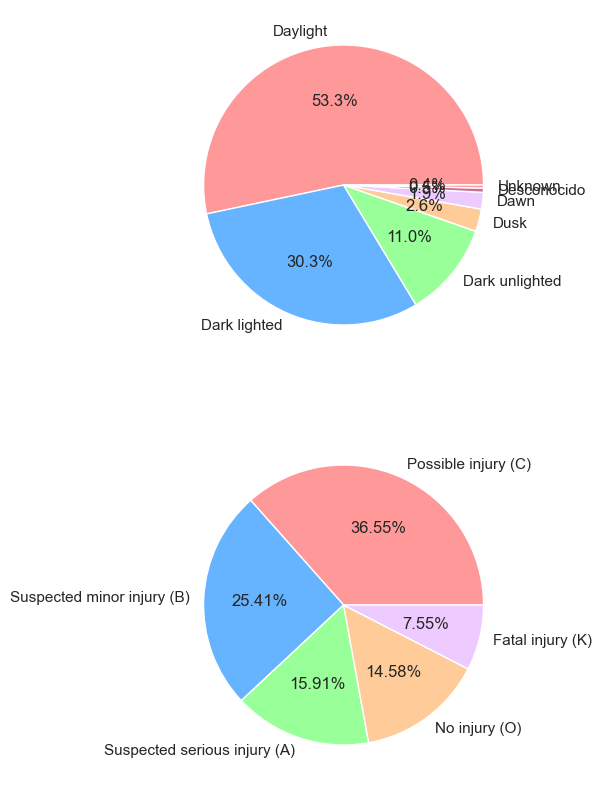

In [665]:

fig2, ax2 = plt.subplots(2, 1, figsize=(16, 10))

# Columna: "Lighting Conditions"
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#EDCAFF','#c76f9a']

data = df['Lighting Conditions'].value_counts(normalize=True) * 100
ax2[0].pie(data, labels = data.index, autopct='%.1f%%',colors=colores)

# Columna:"Worst Injury in Crash"
data = df['Worst Injury in Crash'].value_counts(normalize=True) * 100
ax2[1].pie(data, labels = data.index, autopct='%.2f%%', colors=colores)

La mayoria de accidentes ocurren durante el dia y no la noche.

CANTIDAD DE ACCIDENTES POR MES

In [666]:
print(df['Crash Month'].value_counts())

Crash Month
October      695
September    647
November     625
December     604
June         586
May          580
January      559
March        542
July         531
August       512
February     482
April        446
Name: count, dtype: int64


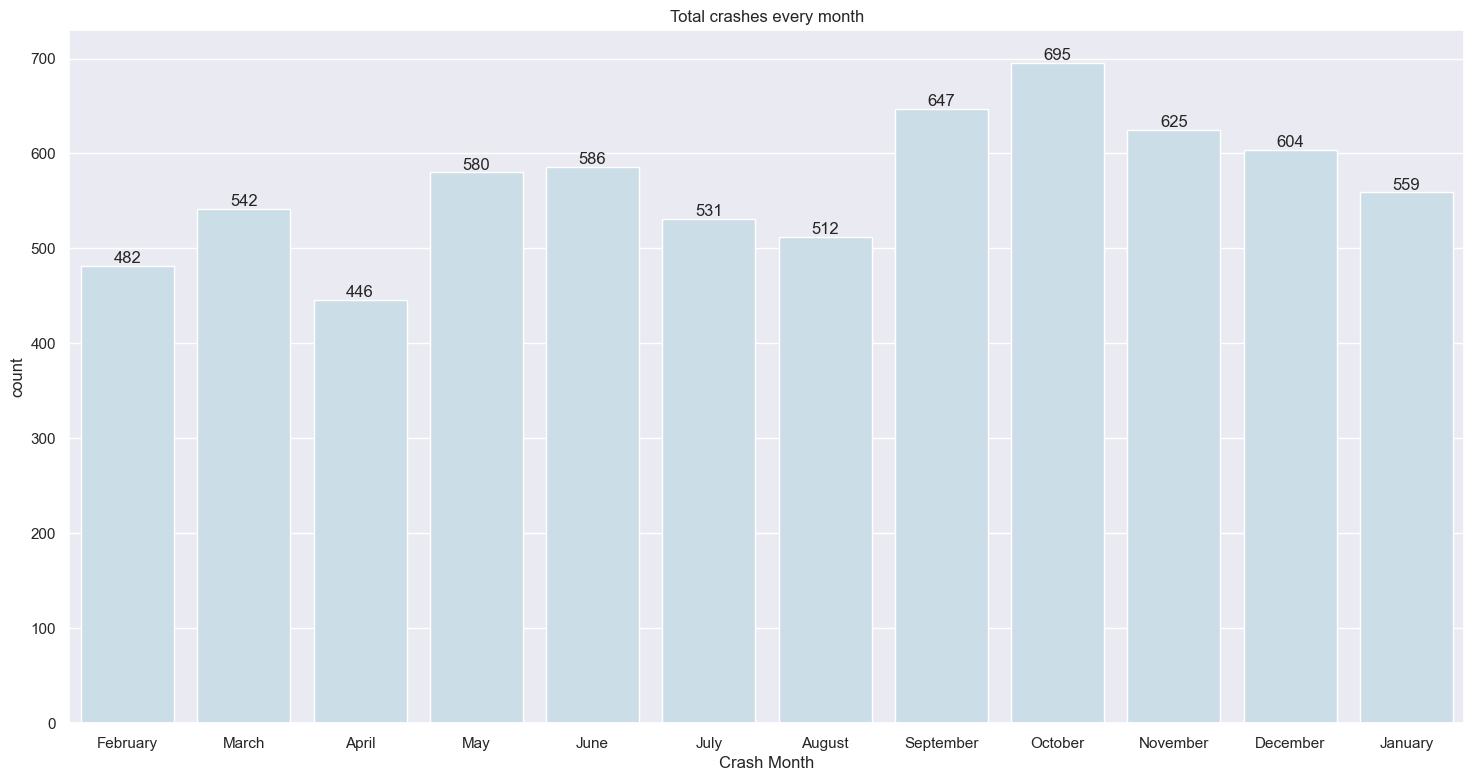

<Figure size 200x500 with 0 Axes>

In [667]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Crash Month', data=df)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every month")
plt.show()
plt.clf()

Octubre es el mes de mas accidentes.

VARIABLE GENERO

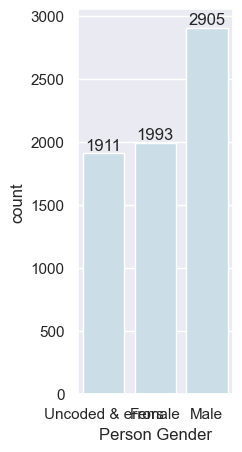

In [668]:
# En la mayoria de accidentes intervinieron Hombres
ax = sns.countplot(x = 'Person Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

Se comprueba una primer hipotesis repecto a que en la mayoria de accidentes intervinieron Hombres.

FRECUENCIAS DE DATOS 

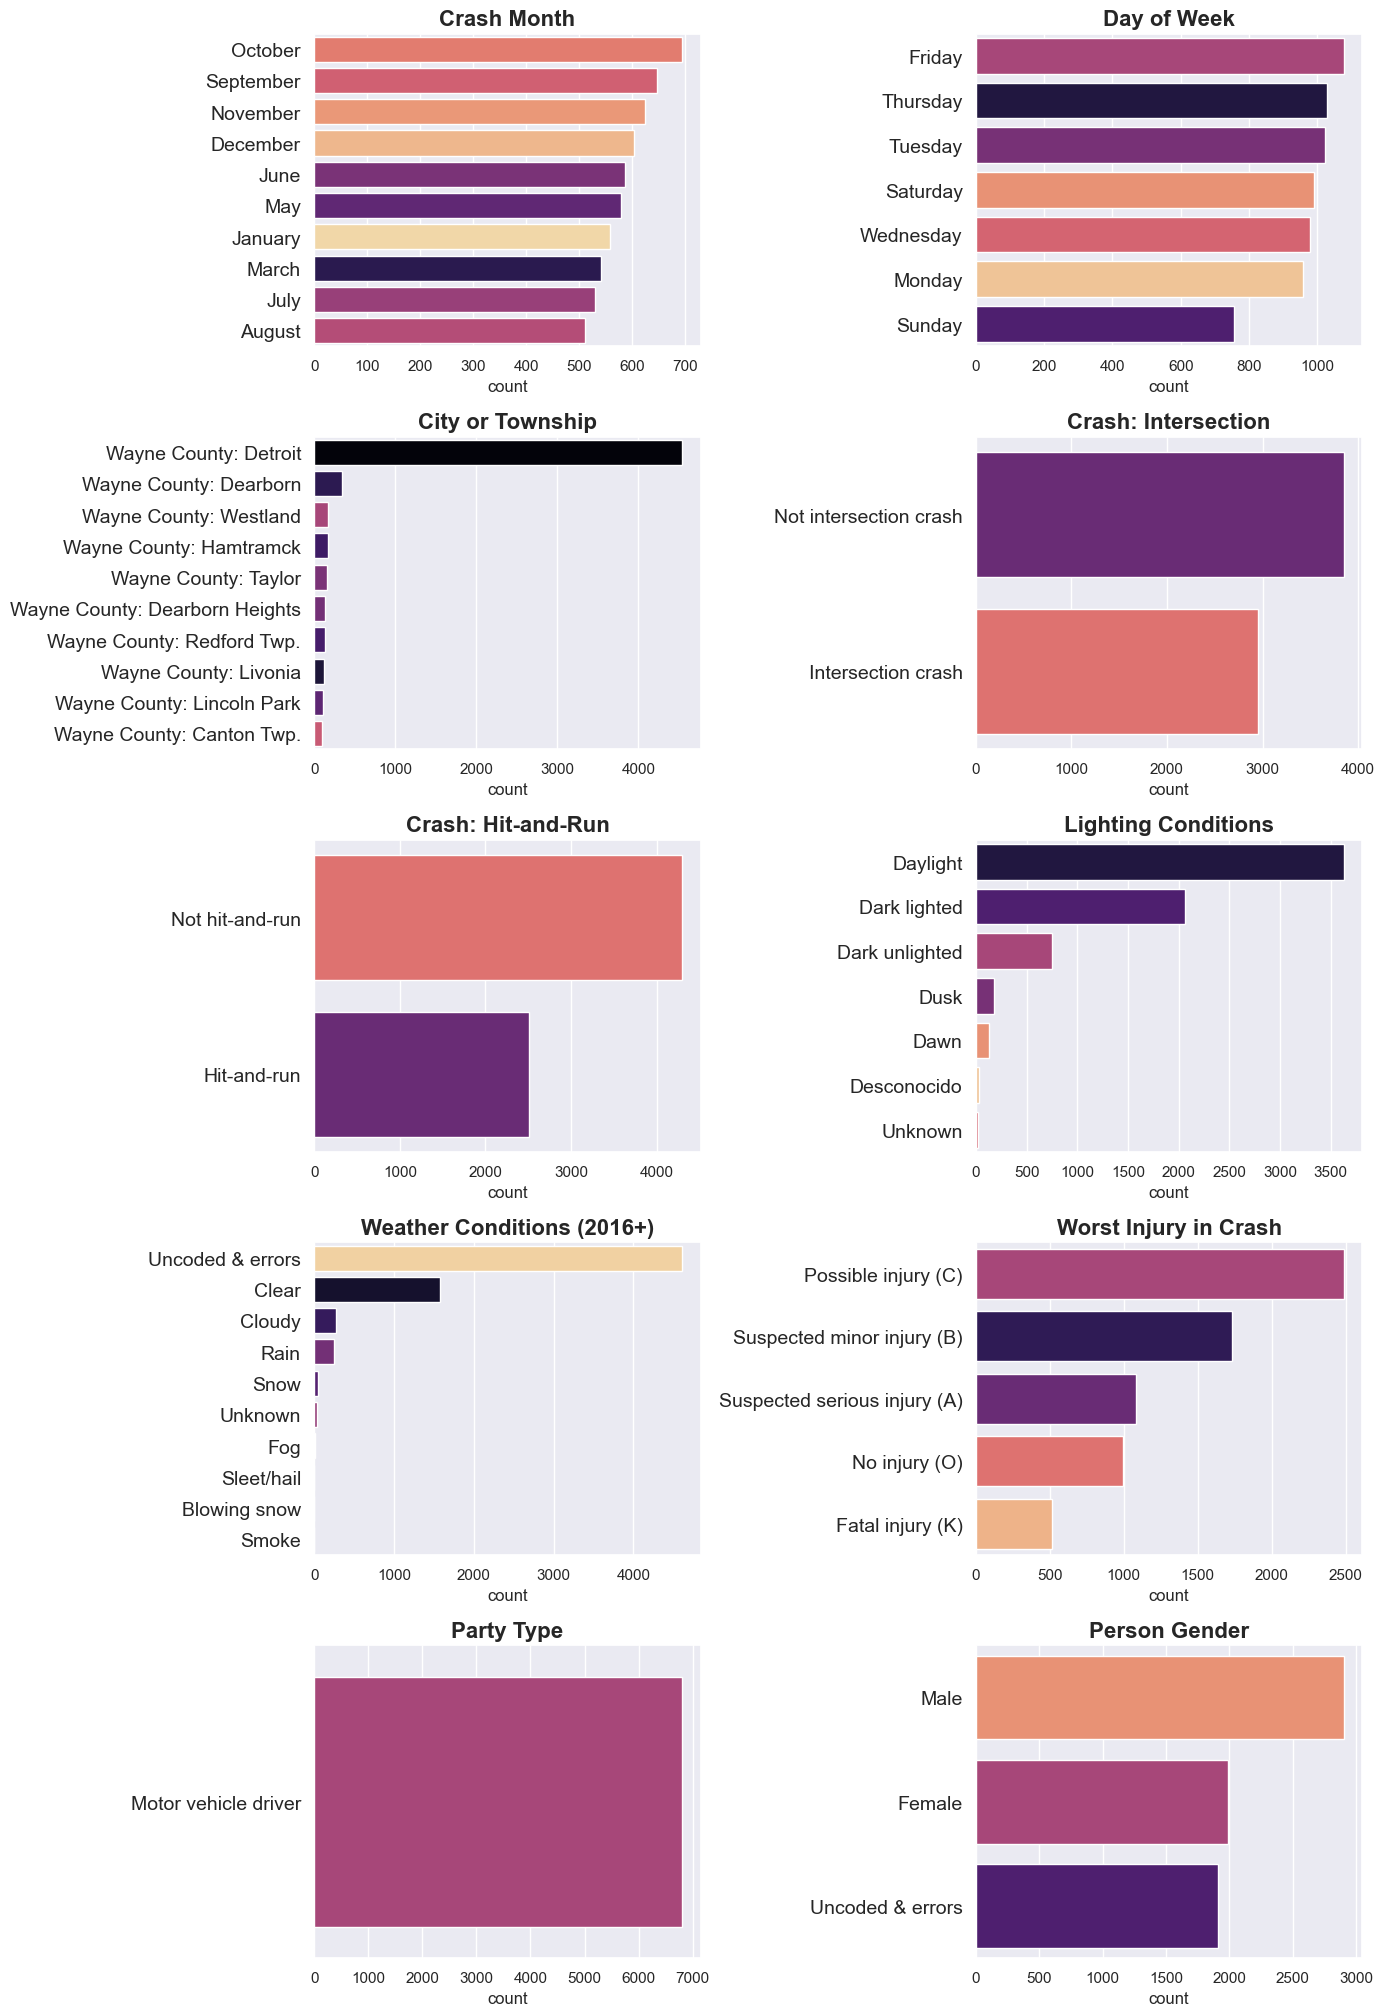

In [669]:
colunas = ['Crash Month', 'Day of Week', 'City or Township',
       'Crash: Intersection', 'Crash: Hit-and-Run', 'Lighting Conditions',
       'Weather Conditions (2016+)', 'Worst Injury in Crash', 'Party Type', 'Person Gender']

plt.figure(figsize=(14,40))
for i,col in enumerate(colunas):
    ax = plt.subplot(10,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[0:10], hue=df[col], palette="magma")
    plt.title(col, fontweight='bold', fontsize=16)
    plt.yticks(fontsize=14)
    plt.ylabel(None)
plt.tight_layout()
plt.show()

FRECUENCIA DE ACCIDENTES POR HORA

C:\Users\mastr\AppData\Local\Temp\ipykernel_1928\1594158947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Time of Day'], order=df['Time of Day'].value_counts().index[0:10],


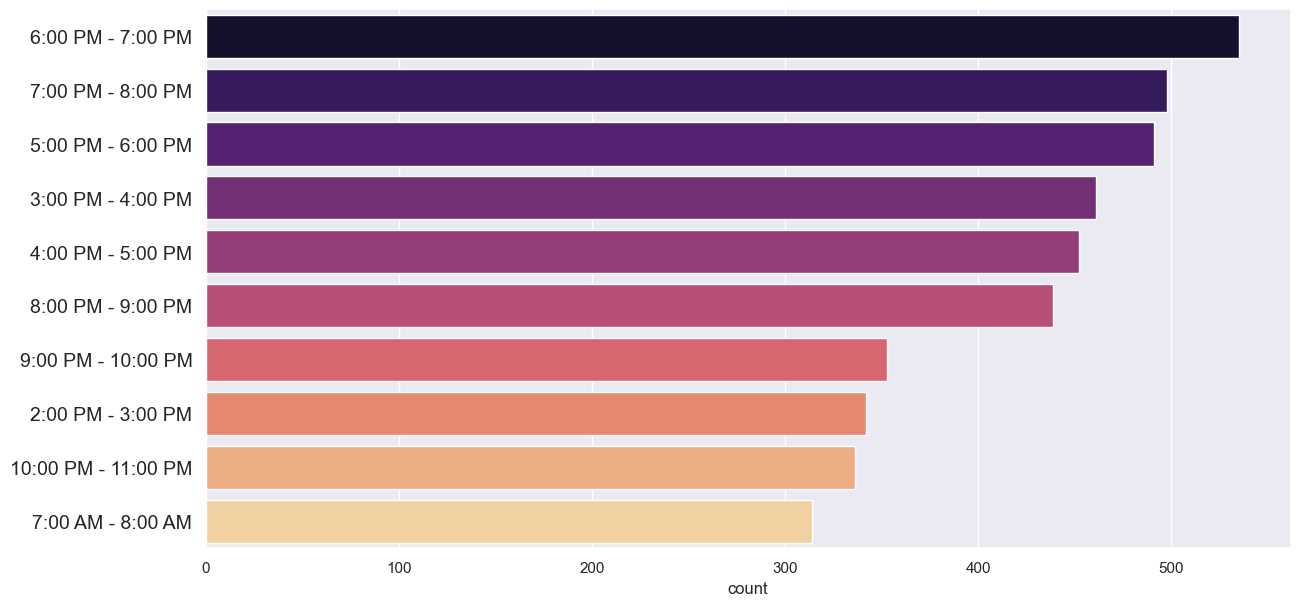

In [670]:
plt.figure(figsize=(14,7))
sns.countplot(y=df['Time of Day'], order=df['Time of Day'].value_counts().index[0:10],
              hue_order=df['Day of Week'].value_counts().index[0:3], palette="magma")
plt.yticks(fontsize=14)
plt.ylabel(None)
plt.show()

Nuevamente se observa que la franja horaria de 6 a 7 es en la que se produce la mayor cantidad de accidentes.

VARIABLE EDAD


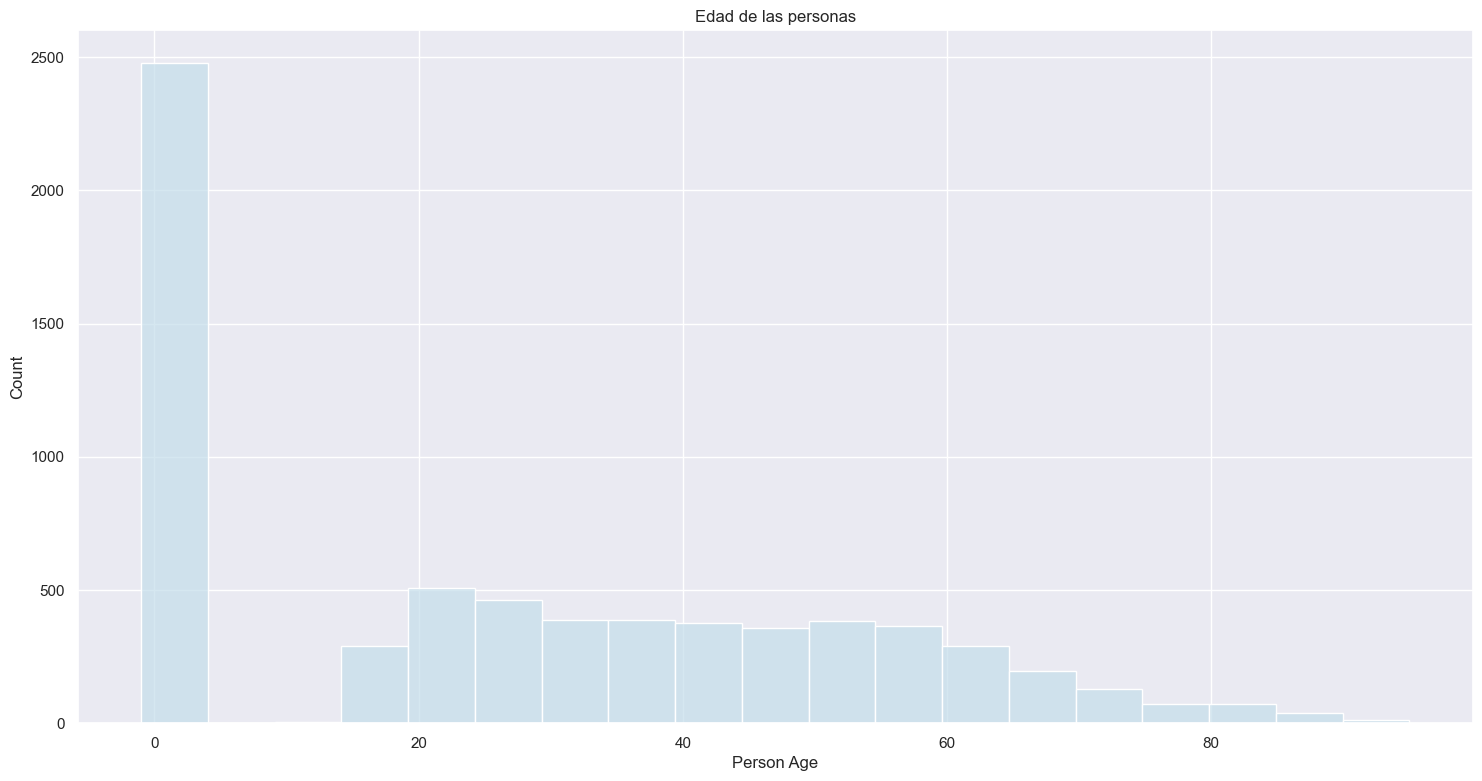

<Figure size 200x500 with 0 Axes>

In [671]:
plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=df)
plt.title("Edad de las personas")
plt.show()
plt.clf()

 Se observan muchos datos invalidos de nacimiento por lo que se removeran en el siguiente grafico.

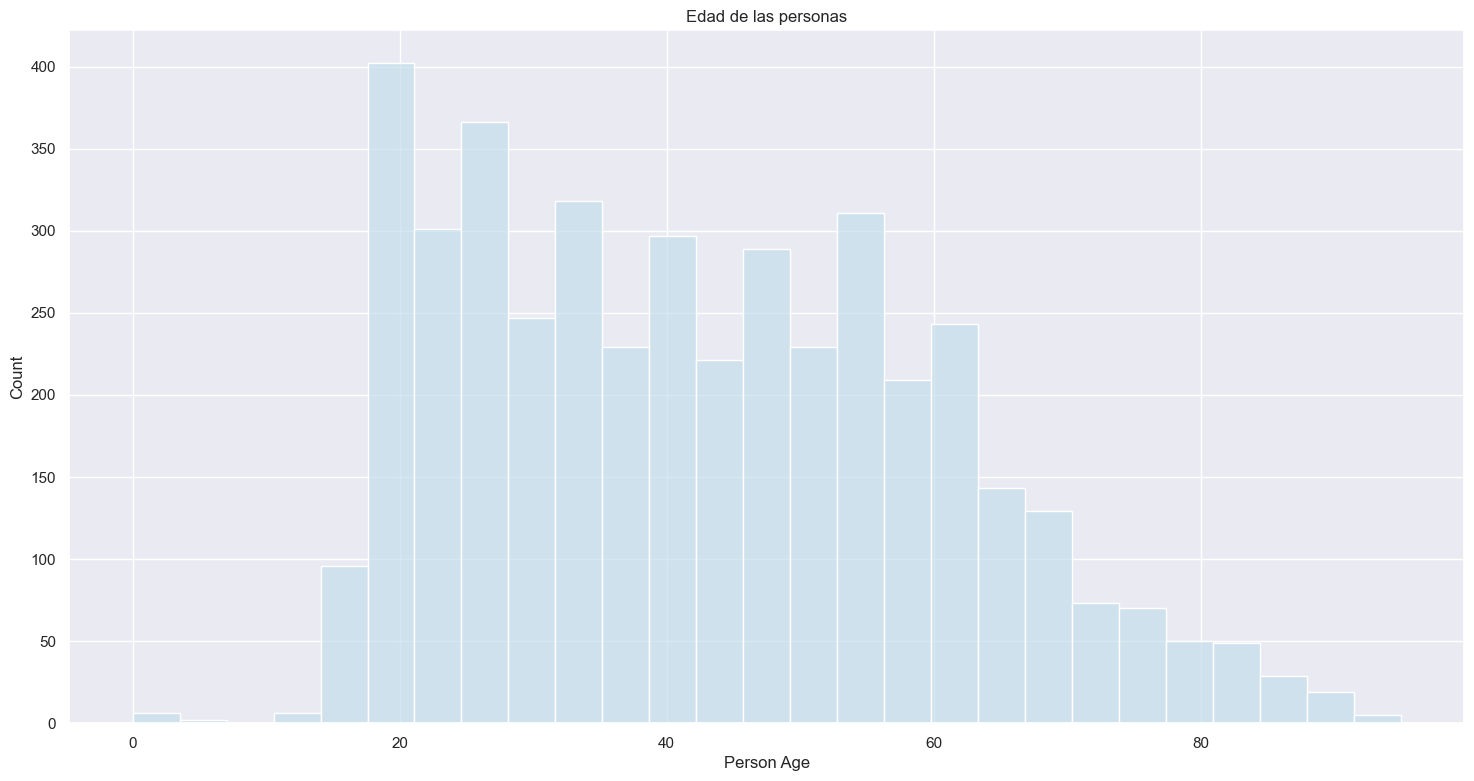

<Figure size 200x500 with 0 Axes>

In [672]:
age = df[df['Person Age'] != -1]

plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=age)
plt.title("Edad de las personas")
plt.show()
plt.clf()

A partir de los 20 años se observa la mayor cantidad de accidentes disminuyendo progresivamente a medida que aumenta la edad.

<Axes: ylabel='Person Age'>

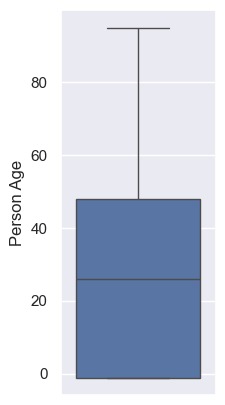

In [673]:
#Boxplot de variable edad

sns.set(rc = {"figure.figsize" : (2,5)})

sns.boxplot(df["Person Age"])

<Axes: xlabel='Person Age', ylabel='Worst Injury in Crash'>

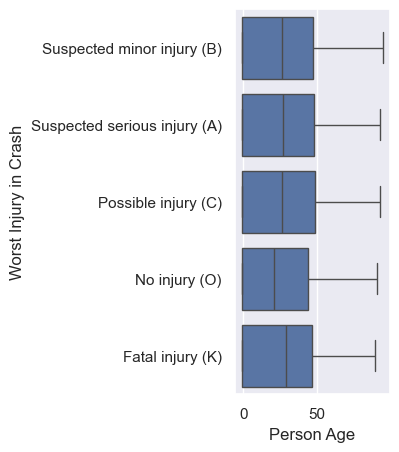

In [674]:
#Boxplot Person Age con respecto a Worst Injury in Crash
sns.boxplot(x = 'Person Age', y = 'Worst Injury in Crash', data = df) 


HEATMAPS

C:\Users\mastr\AppData\Local\Temp\ipykernel_1928\2401381886.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time of Day'] = pd.to_datetime(df['Time of Day']).dt.strftime('%H')


[Text(0.5, 11.249999999999995, 'Hora del dia'),
 Text(92.25, 0.5, 'Daños en el accidente')]

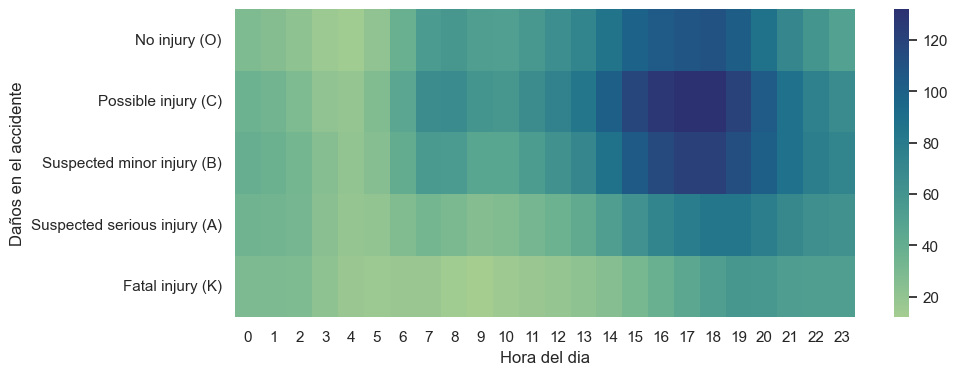

In [675]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

# "HORA DEL DIA" vs "LESIONES"

df['Time of Day']= df['Time of Day'].astype(str).str[0:8]
df.drop(df[(df['Time of Day'] == 'Unknown')].index, inplace=True)
df['Time of Day'] = pd.to_datetime(df['Time of Day']).dt.strftime('%H')

categories= ["No injury (O)", 
             "Possible injury (C)", 
             "Suspected minor injury (B)", 
             "Suspected serious injury (A)", 
             "Fatal injury (K)"]

col1 = 'Worst Injury in Crash'
col2 = 'Time of Day'

df3 = df.groupby([col1, col2]).size()
df3 = pd.DataFrame(df3).reset_index()
df3 = df3.rename(columns={0: "count"})
df3 = df3.pivot(index=col1, columns=col2, values='count')

df3.index = pd.CategoricalIndex(df3.index, categories= ["No injury (O)",
                                             "Possible injury (C)", 
                                             "Suspected minor injury (B)", 
                                             "Suspected serious injury (A)", 
                                             "Fatal injury (K)"])
df3.sort_index(level=0, inplace=True)

df3_smooth = gaussian_filter(df3, sigma=1)
sns.heatmap(df3_smooth, vmin=np.min(df3_smooth), 
            vmax=np.max(df3_smooth), ax=ax, cmap = 'crest')

yticks = np.linspace(0.5, 4.5,len(categories))
ax.set_yticks(yticks)
ax.set_yticklabels(categories, rotation=0)
ax.set(xlabel='Hora del dia', ylabel='Daños en el accidente')



En el rango horario de las tarde 16 a 23 hs. se observa mayor posibilidad en los daños.

[Text(0.5, 11.249999999999995, 'Velocidad'),
 Text(92.24999999999999, 0.5, 'Lesiones')]

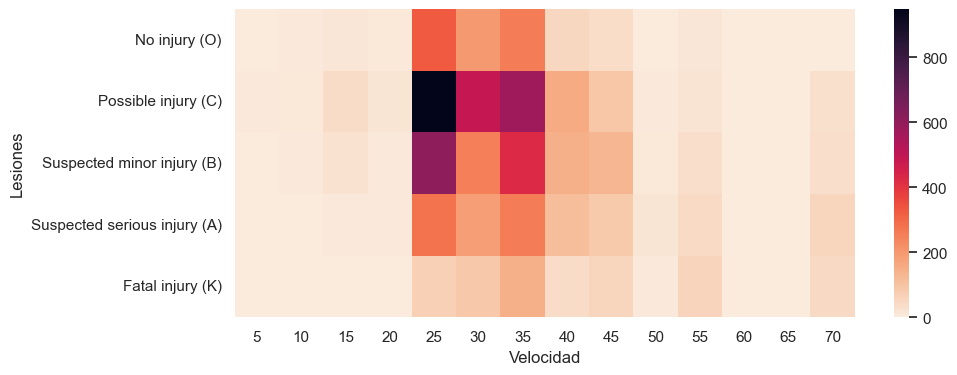

In [676]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

# VELOCIDAD VS LESIONES

col1 = 'Worst Injury in Crash'
col2 = 'Speed Limit at Crash Site'


mask = df['Speed Limit at Crash Site'].isin(['Uncoded & errors'])
df2 = df[~mask]

df3 = df2.groupby([col1, col2]).size()
df3 = pd.DataFrame(df3).reset_index()
df3 = df3.rename(columns={0: "count"})
df3 = df3.pivot(index=col1, columns=col2, values='count')

order = pd.Series(df2["Speed Limit at Crash Site"].unique().astype(float)).sort_values().astype(int).astype(str)
df3 = df3[order]

categories = ["No injury (O)", 
              "Possible injury (C)", 
              "Suspected minor injury (B)", 
              "Suspected serious injury (A)", 
              "Fatal injury (K)"]

df3.index = pd.CategoricalIndex(df3.index, categories = categories)
df3.sort_index(level=0, inplace=True)
df3 = df3.fillna(0)

sns.heatmap(df3, cmap = 'rocket_r', ax=ax)
ax.set(xlabel='Velocidad', ylabel='Lesiones')


Entre las velocidades de 25 y 45 km/hs se producen la mayor cantidad de siniestros. 

PRIMERAS CONCLUSIONES


La mayoria de los peatones involucrados en accidentes sufrieron lesiones y Los hombres han sufrido mayor cantidad de accidentes que las mujeres. Respecto
a la velocidad en donde ocurre la mayor cantidad de accidentes es de 25 Km/h y la mayoria de los accidentes suceden de dia con el clima despejado.
Si sos un peaton y no quiere sufir accidentes es recomendable pasear los domingos del mes de octubre.